In [56]:
pip install igraph


     ---------------------------------------- 2.8/2.8 MB 11.9 MB/s eta 0:00:00
  Using cached texttable-1.6.4-py2.py3-none-any.whl (10 kB)


You should consider upgrading via the 'C:\Users\KKo1\Anaconda3\envs\py38\python.exe -m pip install --upgrade pip' command.


In [58]:
pip install louvain


  Using cached louvain-0.7.1-cp39-cp39-win_amd64.whl (94 kB)


You should consider upgrading via the 'C:\Users\KKo1\Anaconda3\envs\py38\python.exe -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
from numpy import linalg as la
from scipy.sparse import issparse
import loompy
import anndata
import scvelo as scv
scv.logging.print_version()

Running scvelo 0.2.5 (python 3.8.16) on 2023-06-05 17:00.


In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80,dpi_save=300, facecolor='white')

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.13.5 python-igraph==0.10.4 louvain==0.8.0 pynndescent==0.5.5


In [3]:
import os
os.chdir('F:/Ko/67ESCC_PCN_integration_07-19-22/immune_cell_T4_M4')

In [4]:
import scanpy.external as sce

In [5]:
adata_imn = sc.read('Immune_Group_ABC_after_celltype_clustering.h5ad')

In [6]:
# Epi and fibroblast dataset generated from Script "15_CAF_analysis"
adata_epi_tot = sc.read('F:/Ko/67ESCC_PCN_integration_07-19-22/immune_cell_T4_M4/epi_and_fibro_06-02-2023.h5ad')

In [7]:
adata_epi_tot.obs['crude']

AAACCTGAGCTAAACA-1-0-0-0     Fibroblast
AAACCTGAGCTGCAAG-1-0-0-0          Tumor
AAACCTGAGTACGTAA-1-0-0-0     Fibroblast
AAACCTGCACTGAAGG-1-0-0-0          Tumor
AAACCTGGTGCACCAC-1-0-0-0          Tumor
                                ...    
TTTGTCACAAGACGTG-1-60-0-2         Tumor
TTTGTCACAGGTCTCG-1-60-0-2         Tumor
TTTGTCAGTAGCGCTC-1-60-0-2         Tumor
TTTGTCATCGACCAGC-1-60-0-2         Tumor
TTTGTCATCGAGAGCA-1-60-0-2         Tumor
Name: crude, Length: 138849, dtype: category
Categories (2, object): ['Fibroblast', 'Tumor']

In [8]:
adata_epi_tot.obs['patient_cluster']

AAACCTGAGCTAAACA-1-0-0-0     Group A
AAACCTGAGCTGCAAG-1-0-0-0     Group A
AAACCTGAGTACGTAA-1-0-0-0     Group A
AAACCTGCACTGAAGG-1-0-0-0     Group A
AAACCTGGTGCACCAC-1-0-0-0     Group A
                              ...   
TTTGTCACAAGACGTG-1-60-0-2    Group C
TTTGTCACAGGTCTCG-1-60-0-2    Group C
TTTGTCAGTAGCGCTC-1-60-0-2    Group C
TTTGTCATCGACCAGC-1-60-0-2    Group C
TTTGTCATCGAGAGCA-1-60-0-2    Group C
Name: patient_cluster, Length: 138849, dtype: category
Categories (3, object): ['Group A', 'Group B', 'Group C']

In [24]:
adata_epi = adata_epi_tot[adata_epi_tot.obs['patient_cluster'].isin(['Group A','Group B','Group C'])]

In [11]:
#new_cluster_names = [
#    'ESC1', 'ESC2',
#    'ESC3']
#adata_imn.rename_categories('patient_cluster', new_cluster_names)

In [12]:
adata_epi

View of AnnData object with n_obs × n_vars = 138849 × 11060
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'patient', 'leiden', 'batch', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'source', 'patient_cluster', 'Notch_score', 'Tp53_score', 'Cdkn2a_score', 'NFkB_score', 'GOBP_tgfb_score', 'GOBP_notch_score', 'GOBP_wnt_score', 'GOBP_hippo_score', 'GOBP_cellcycle_score', 'GOBP_histone_score', 'GOBP_pi3k_score', 'celltype', 'crude', 'celltype_detail', 'dataset', 'T_patient_cluster4', 'Myeloid_patient_cluster4', 'Myeloid_to_T_cluster44'
    var: 'gene_ids', 'mt', 'ribo', 'hb', 'feature_types-0', 'n_cells-0-0', 'n_cells_by_counts-0-0', 'mean_counts-0-0', 'pct_dropout_by_counts-0-0', 'total_counts-0-0', 'n_cells-1-0', 'n_cells_by_counts-1-0', 'mean_counts-1-0', 'pct_dropout_by_counts-1-0', 'total_counts-1-0', 'n_cells-10-0', 'n_cells_by_counts-10-0', 'mean_counts-10-0', 'pct_dropo

In [12]:
adata_imn_A = adata_imn[adata_imn.obs['patient_cluster']=='Group A']
adata_imn_B = adata_imn[adata_imn.obs['patient_cluster']=='Group B']
adata_imn_C = adata_imn[adata_imn.obs['patient_cluster']=='Group C']

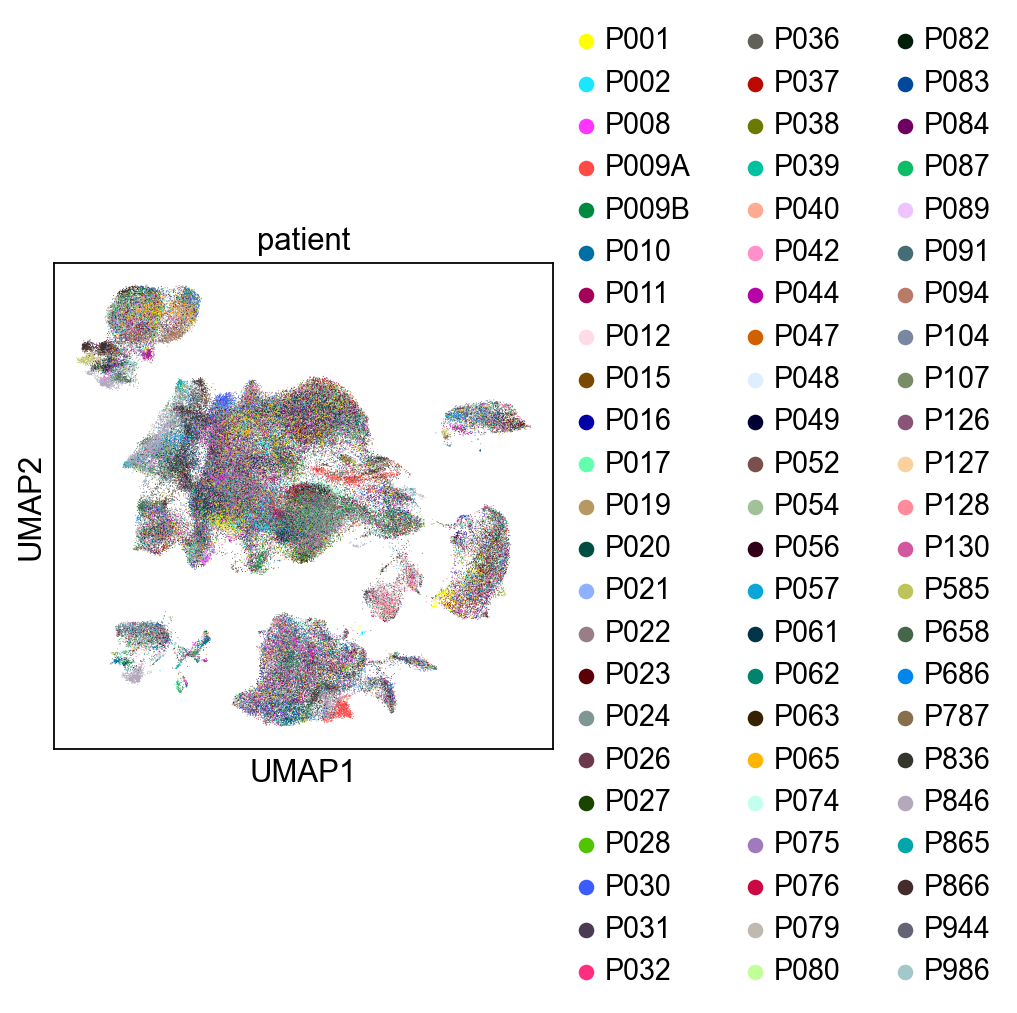

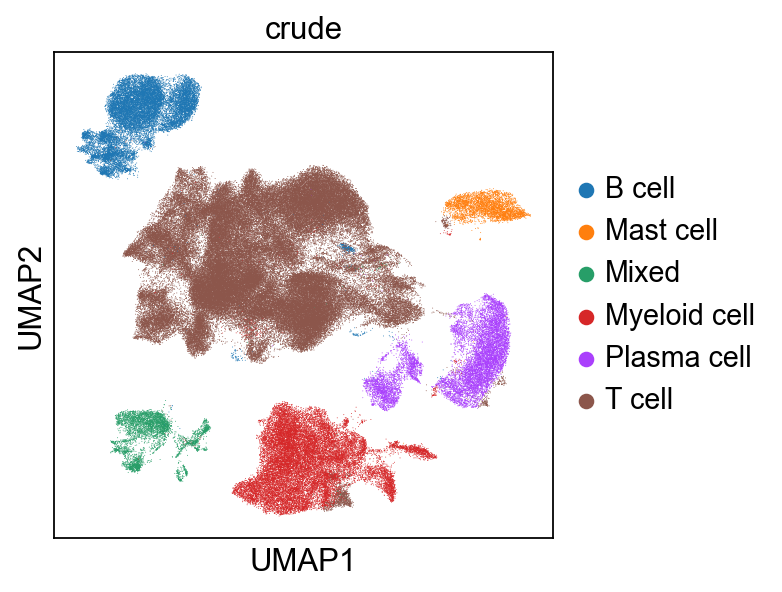

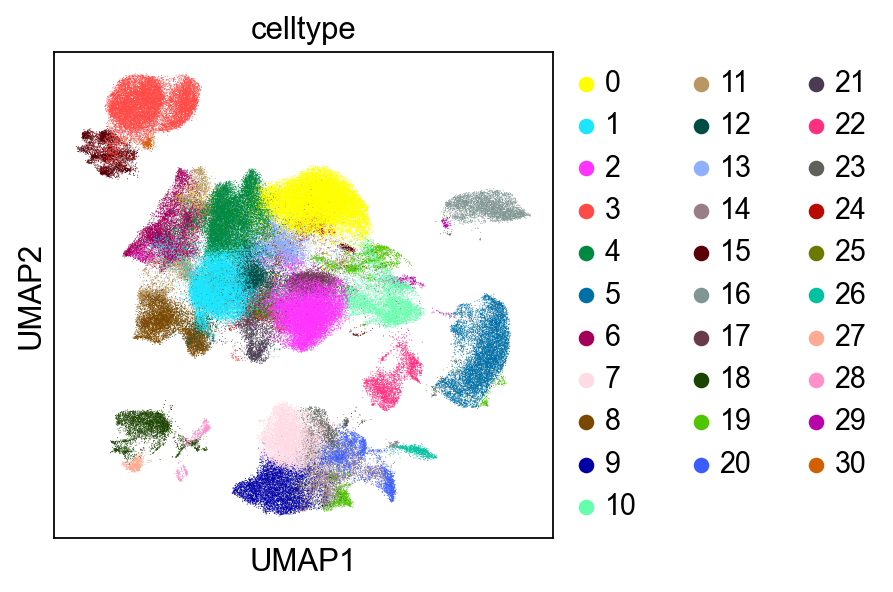

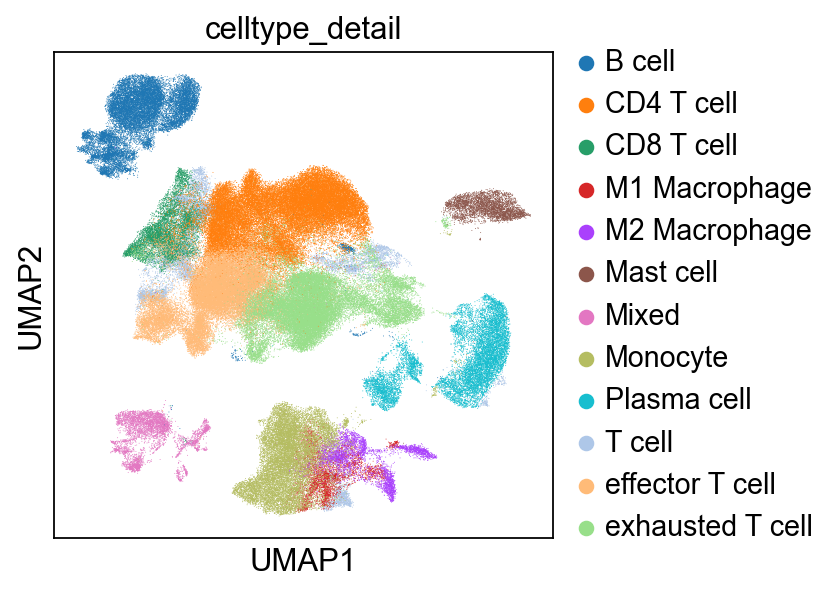

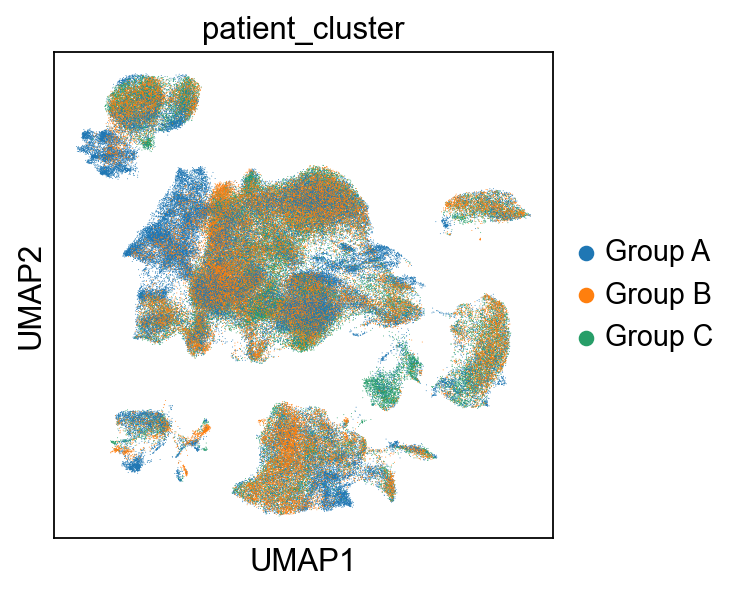

In [13]:
sc.pl.umap(adata_imn, color=['patient'])
sc.pl.umap(adata_imn, color=['crude'])
sc.pl.umap(adata_imn, color=['celltype'])
sc.pl.umap(adata_imn, color=['celltype_detail'])
sc.pl.umap(adata_imn, color=['patient_cluster'])

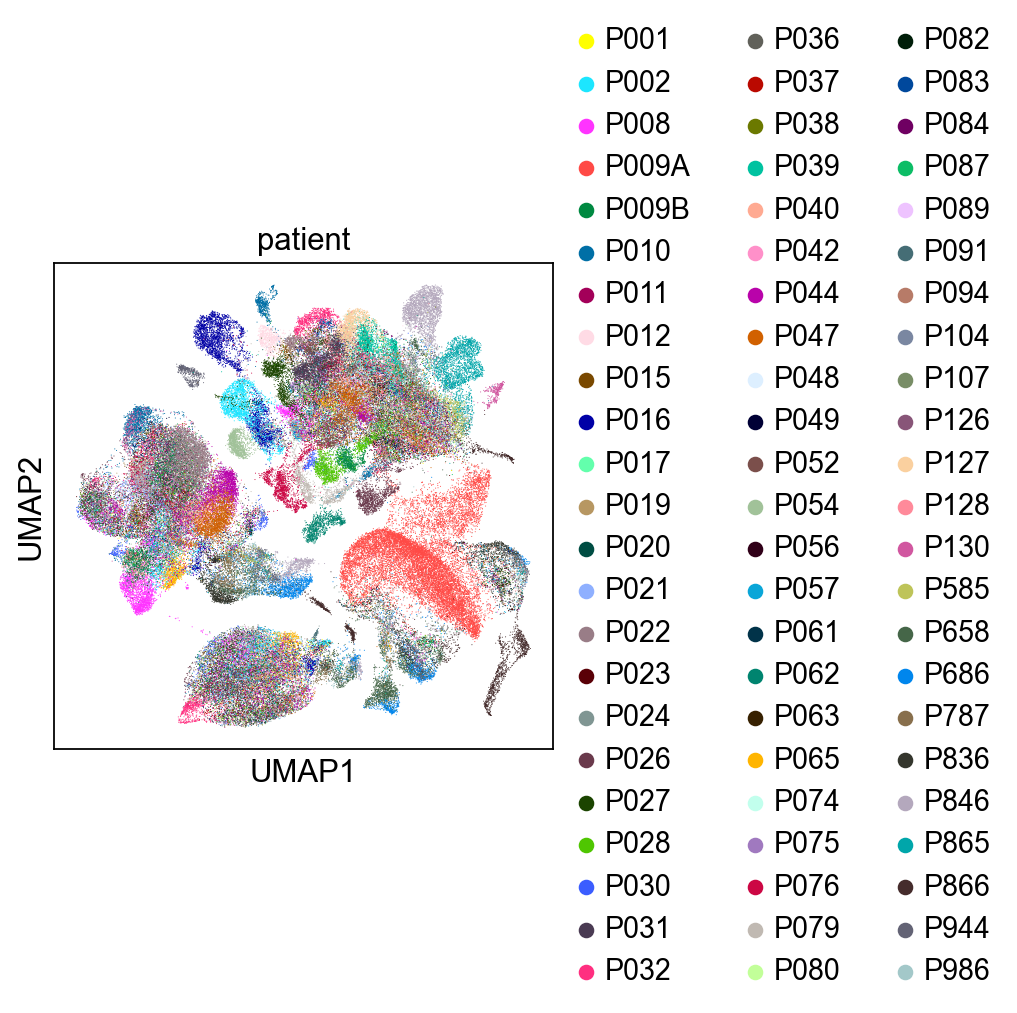

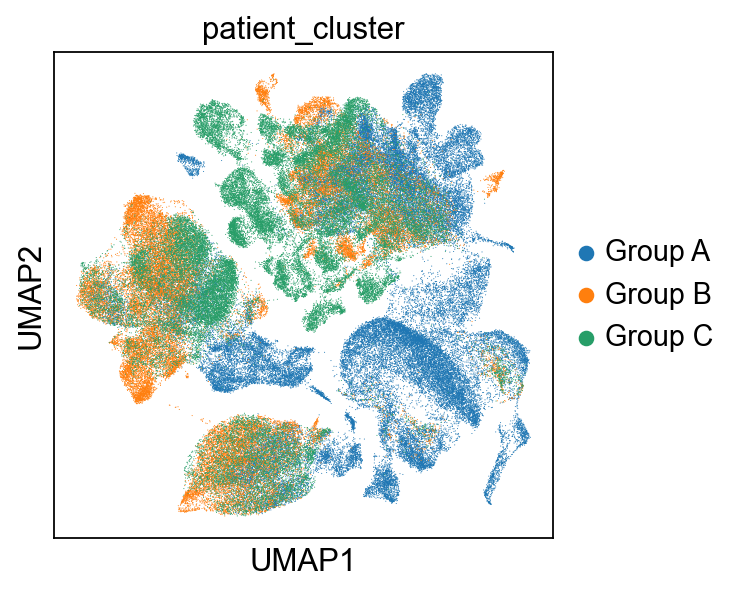

In [14]:
sc.pl.umap(adata_epi_tot, color=['patient'])
sc.pl.umap(adata_epi_tot, color=['patient_cluster'])

In [15]:
adata_epi.obs

n_genes  n_genes_by_counts  total_counts  \
AAACCTGAGCTAAACA-1-0-0-0    2747.0               2630   1283.869751   
AAACCTGAGCTGCAAG-1-0-0-0     696.0                664    821.045593   
AAACCTGAGTACGTAA-1-0-0-0     366.0                354    642.963806   
AAACCTGCACTGAAGG-1-0-0-0     720.0                699    956.075134   
AAACCTGGTGCACCAC-1-0-0-0    1406.0               1366    388.112122   
...                            ...                ...           ...   
TTTGTCACAAGACGTG-1-60-0-2      NaN               4055   2505.033691   
TTTGTCACAGGTCTCG-1-60-0-2      NaN               2571   2158.090820   
TTTGTCAGTAGCGCTC-1-60-0-2      NaN               2401   2428.530029   
TTTGTCATCGACCAGC-1-60-0-2      NaN               3596   2603.228271   
TTTGTCATCGAGAGCA-1-60-0-2      NaN               4121   2500.936523   

                           total_counts_mt  pct_counts_mt tissue patient  \
AAACCTGAGCTAAACA-1-0-0-0         19.201120       1.495566  tumor    P686   
AAACCTGAGCTGCAAG-1-0-0-0         22.309502       2.717206  tumor    P686   
AAACCTGAGTACGTAA-1-0-0-0         39.510632       6.145079  tumor    P686   
AAACCTGCACTGAAGG-1-0-0-0         19.870264       2.078316  tumor    P686   
AAACCTGGTGCACCAC-1-0-0-0          6.067459       1.563326  tumor    P686   
...                                    ...            ...    ...     ...   
TTTGTCACAAGACGTG-1-60-0-2         3.604661       0.143897  tumor    P079   
TTTGTCACAGGTCTCG-1-60-0-2         0.000000       0.000000  tumor    P079   
TTTGTCAGTAGCGCTC-1-60-0-2        40.010536       1.647521  tumor    P079   
TTTGTCATCGACCAGC-1-60-0-2        14.866852       0.571093  tumor    P079   
TTTGTCATCGAGAGCA-1-60-0-2        33.585625       1.342922  tumor    P079   

                          leiden batch  total_counts_ribo  ...  \
AAACCTGAGCTAAACA-1-0-0-0       8     0         161.193115  ...   
AAACCTGAGCTGCAAG-1-0-0-0      16     0          97.282425  ...   
AAACCTGAGTACGTAA-1-0-0-0       8     0         109.494339  ...   
AAACCTGCACTGAAGG-1-0-0-0      33     0         186.630081  ...   
AAACCTGGTGCACCAC-1-0-0-0      19     0          75.051537  ...   
...                          ...   ...                ...  ...   
TTTGTCACAAGACGTG-1-60-0-2     41     2         200.048752  ...   
TTTGTCACAGGTCTCG-1-60-0-2     41     2         230.678619  ...   
TTTGTCAGTAGCGCTC-1-60-0-2     25     2         164.578796  ...   
TTTGTCATCGACCAGC-1-60-0-2     25     2         203.210175  ...   
TTTGTCATCGAGAGCA-1-60-0-2     25     2         213.640610  ...   

                           GOBP_cellcycle_score  GOBP_histone_score  \
AAACCTGAGCTAAACA-1-0-0-0               0.026385           -0.045633   
AAACCTGAGCTGCAAG-1-0-0-0               0.019255           -0.034572   
AAACCTGAGTACGTAA-1-0-0-0               0.025115            0.036140   
AAACCTGCACTGAAGG-1-0-0-0              -0.013321           -0.050716   
AAACCTGGTGCACCAC-1-0-0-0              -0.010753           -0.027467   
...                                         ...                 ...   
TTTGTCACAAGACGTG-1-60-0-2              0.164452            0.068549   
TTTGTCACAGGTCTCG-1-60-0-2              0.014408           -0.000805   
TTTGTCAGTAGCGCTC-1-60-0-2              0.065215            0.005955   
TTTGTCATCGACCAGC-1-60-0-2             -0.007144           -0.038660   
TTTGTCATCGAGAGCA-1-60-0-2              0.037470           -0.000425   

                           GOBP_pi3k_score    celltype       crude  \
AAACCTGAGCTAAACA-1-0-0-0          0.042776  epithelial  Fibroblast   
AAACCTGAGCTGCAAG-1-0-0-0         -0.058895  epithelial       Tumor   
AAACCTGAGTACGTAA-1-0-0-0          0.036661  epithelial  Fibroblast   
AAACCTGCACTGAAGG-1-0-0-0         -0.010067  epithelial       Tumor   
AAACCTGGTGCACCAC-1-0-0-0         -0.025247  epithelial       Tumor   
...                                    ...         ...         ...   
TTTGTCACAAGACGTG-1-60-0-2        -0.096092  epithelial       Tumor   
TTTGTCACAGGTCTCG-1-60-0-2        -0.078653  epithelial 

In [16]:
adata_imn.obs

n_genes  n_genes_by_counts  total_counts  \
AAACCTGAGTAGCCGA-1-0-0    3934.0               3879   1452.073242   
AAACCTGCAAGAGGCT-1-0-0     674.0                669    882.995728   
AAACCTGCAGTATCTG-1-0-0    1014.0               1003    956.411804   
AAACCTGCATGCCTTC-1-0-0    2607.0               2556   1262.646240   
AAACCTGGTGCCTGGT-1-0-0     896.0                885   1091.559448   
...                          ...                ...           ...   
TTTGGTTCAAGCCATT-1-24-2   4456.0               4328   1867.209229   
TTTGGTTGTCACCCAG-1-24-2    689.0                642    487.017822   
TTTGTCAAGCGCTTAT-1-24-2    248.0                235    523.794067   
TTTGTCAGTCCTCTTG-1-24-2   2711.0               2644   1972.602417   
TTTGTCAGTCTCTTTA-1-24-2   1890.0               1858   1673.672119   

                         total_counts_mt  pct_counts_mt tissue patient leiden  \
AAACCTGAGTAGCCGA-1-0-0         18.802568       1.294877  tumor    P686      6   
AAACCTGCAAGAGGCT-1-0-0         11.229170       1.271713  tumor    P686      6   
AAACCTGCAGTATCTG-1-0-0         18.788149       1.964441  tumor    P686      6   
AAACCTGCATGCCTTC-1-0-0         23.060396       1.826355  tumor    P686     14   
AAACCTGGTGCCTGGT-1-0-0         17.238060       1.579214  tumor    P686      6   
...                                  ...            ...    ...     ...    ...   
TTTGGTTCAAGCCATT-1-24-2        29.546848       1.582407  tumor    P001      0   
TTTGGTTGTCACCCAG-1-24-2        17.679008       3.630054  tumor    P001      5   
TTTGTCAAGCGCTTAT-1-24-2         8.050291       1.536919  tumor    P001      5   
TTTGTCAGTCCTCTTG-1-24-2        24.433256       1.238631  tumor    P001     10   
TTTGTCAGTCTCTTTA-1-24-2         7.590561       0.453527  tumor    P001      4   

                        batch  total_counts_ribo  pct_counts_ribo  \
AAACCTGAGTAGCCGA-1-0-0      0         198.197769        13.649295   
AAACCTGCAAGAGGCT-1-0-0      0         213.666718        24.197933   
AAACCTGCAGTATCTG-1-0-0      0         221.148575        23.122736   
AAACCTGCATGCCTTC-1-0-0      0         161.333832        12.777437   
AAACCTGGTGCCTGGT-1-0-0      0         176.360626        16.156759   
...                       ...                ...              ...   
TTTGGTTCAAGCCATT-1-24-2     2         172.502136         9.238501   
TTTGGTTGTCACCCAG-1-24-2     2          59.435638        12.203997   
TTTGTCAAGCGCTTAT-1-24-2     2          57.140697        10.909000   
TTTGTCAGTCCTCTTG-1-24-2     2         120.637726         6.115664   
TTTGTCAGTCTCTTTA-1-24-2     2         163.753265         9.784071   

                         total_counts_hb  pct_counts_hb  percent_mt2  \
AAACCTGAGTAGCCGA-1-0-0          0.000000       0.000000     0.012949   
AAACCTGCAAGAGGCT-1-0-0          0.000000       0.000000     0.012717   
AAACCTGCAGTATCTG-1-0-0          0.000000       0.000000     0.019644   
AAACCTGCATGCCTTC-1-0-0          0.000000       0.000000     0.018264   
AAACCTGGTGCCTGGT-1-0-0          0.000000       0.000000     0.015792   
...                                  ...            ...          ...   
TTTGGTTCAAGCCATT-1-24-2         0.172559       0.009242     0.015824   
TTTGGTTGTCACCCAG-1-24-2         0.000000       0.000000     0.036301   
TTTGTCAAGCGCTTAT-1-24-2         0.000000       0.000000     0.015369   
TTTGTCAGTCCTCTTG-1-24-2         0.000000       0.000000     0.012386   
TTTGTCAGTCTCTTTA-1-24-2         0.000000       0.000000     0.004535   

                            n_counts celltype         crude   celltype_detail  \
AAACCTGAGTAGCCGA-1-0-0   1452.073242        6        T cell        CD8 T cell   
AAACCTGCAAGAGGCT-1-0-0    882.995728        6        T cell        CD8 T cell   
AAACCTGCAGTATCTG-1-0-0    956.411804        6        T cell        CD8 T cell   
AAACCTGCATGCCTTC-1-0-0   1262.646240       14  Myeloid cell     M1 Macrophage   
AAACCTGGTGCCTGGT-1-0-0   1091.559448        6        T cell        CD8 T cell   
...                              ...      .

In [25]:
adata_epi.obs['celltype'] = adata_epi.obs['crude']
adata_epi.obs['celltype_detail'] = adata_epi.obs['crude']

In [26]:
adata_epi_A = adata_epi[adata_epi.obs['patient_cluster']=='Group A']
adata_epi_B = adata_epi[adata_epi.obs['patient_cluster']=='Group B']
adata_epi_C = adata_epi[adata_epi.obs['patient_cluster']=='Group C']

In [27]:
adata_A = adata_epi_A.concatenate(adata_imn_A)
adata_B = adata_epi_B.concatenate(adata_imn_B)
adata_C = adata_epi_C.concatenate(adata_imn_C)

In [28]:
adata_A

AnnData object with n_obs × n_vars = 134836 × 11060
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'patient', 'leiden', 'batch', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'source', 'patient_cluster', 'Notch_score', 'Tp53_score', 'Cdkn2a_score', 'NFkB_score', 'GOBP_tgfb_score', 'GOBP_notch_score', 'GOBP_wnt_score', 'GOBP_hippo_score', 'GOBP_cellcycle_score', 'GOBP_histone_score', 'GOBP_pi3k_score', 'celltype', 'crude', 'celltype_detail', 'dataset', 'T_patient_cluster4', 'Myeloid_patient_cluster4', 'Myeloid_to_T_cluster44'
    var: 'gene_ids', 'mt', 'ribo', 'hb', 'feature_types-0', 'n_cells-0-0', 'n_cells_by_counts-0-0', 'mean_counts-0-0', 'pct_dropout_by_counts-0-0', 'total_counts-0-0', 'n_cells-1-0', 'n_cells_by_counts-1-0', 'mean_counts-1-0', 'pct_dropout_by_counts-1-0', 'total_counts-1-0', 'n_cells-2-0', 'n_cells_by_counts-2-0', 'mean_counts-2-0', 'pct_dropout_by_count

In [29]:
adata_B

AnnData object with n_obs × n_vars = 82938 × 11060
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'patient', 'leiden', 'batch', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'source', 'patient_cluster', 'Notch_score', 'Tp53_score', 'Cdkn2a_score', 'NFkB_score', 'GOBP_tgfb_score', 'GOBP_notch_score', 'GOBP_wnt_score', 'GOBP_hippo_score', 'GOBP_cellcycle_score', 'GOBP_histone_score', 'GOBP_pi3k_score', 'celltype', 'crude', 'celltype_detail', 'dataset', 'T_patient_cluster4', 'Myeloid_patient_cluster4', 'Myeloid_to_T_cluster44'
    var: 'gene_ids', 'mt', 'ribo', 'hb', 'feature_types-0', 'n_cells-0-0', 'n_cells_by_counts-0-0', 'mean_counts-0-0', 'pct_dropout_by_counts-0-0', 'total_counts-0-0', 'n_cells-1-0', 'n_cells_by_counts-1-0', 'mean_counts-1-0', 'pct_dropout_by_counts-1-0', 'total_counts-1-0', 'n_cells-2-0', 'n_cells_by_counts-2-0', 'mean_counts-2-0', 'pct_dropout_by_counts

In [30]:
adata_C

AnnData object with n_obs × n_vars = 98379 × 11060
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'patient', 'leiden', 'batch', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'source', 'patient_cluster', 'Notch_score', 'Tp53_score', 'Cdkn2a_score', 'NFkB_score', 'GOBP_tgfb_score', 'GOBP_notch_score', 'GOBP_wnt_score', 'GOBP_hippo_score', 'GOBP_cellcycle_score', 'GOBP_histone_score', 'GOBP_pi3k_score', 'celltype', 'crude', 'celltype_detail', 'dataset', 'T_patient_cluster4', 'Myeloid_patient_cluster4', 'Myeloid_to_T_cluster44'
    var: 'gene_ids', 'mt', 'ribo', 'hb', 'feature_types-0', 'n_cells-0-0', 'n_cells_by_counts-0-0', 'mean_counts-0-0', 'pct_dropout_by_counts-0-0', 'total_counts-0-0', 'n_cells-1-0', 'n_cells_by_counts-1-0', 'mean_counts-1-0', 'pct_dropout_by_counts-1-0', 'total_counts-1-0', 'n_cells-2-0', 'n_cells_by_counts-2-0', 'mean_counts-2-0', 'pct_dropout_by_counts

In [31]:
adata_A.obs.crude = adata_A.obs.crude.astype('category')
adata_A.obs['crude']

AAACCTGAGCTAAACA-1-0-0-0-0     Fibroblast
AAACCTGAGCTGCAAG-1-0-0-0-0          Tumor
AAACCTGAGTACGTAA-1-0-0-0-0     Fibroblast
AAACCTGCACTGAAGG-1-0-0-0-0          Tumor
AAACCTGGTGCACCAC-1-0-0-0-0          Tumor
                                 ...     
TTTGGTTCAAGCCATT-1-24-2-1          T cell
TTTGGTTGTCACCCAG-1-24-2-1     Plasma cell
TTTGTCAAGCGCTTAT-1-24-2-1     Plasma cell
TTTGTCAGTCCTCTTG-1-24-2-1          T cell
TTTGTCAGTCTCTTTA-1-24-2-1          T cell
Name: crude, Length: 134836, dtype: category
Categories (8, object): ['B cell', 'Fibroblast', 'Mast cell', 'Mixed', 'Myeloid cell', 'Plasma cell', 'T cell', 'Tumor']

In [32]:
adata_B.obs.crude = adata_B.obs.crude.astype('category')
adata_B.obs['crude']

AAACCTGAGCTTATCG-1-14-0-1-0           Tumor
AAACCTGAGTTGCAGG-1-14-0-1-0      Fibroblast
AAACCTGCATTCTCAT-1-14-0-1-0      Fibroblast
AAACCTGTCCTAGAAC-1-14-0-1-0           Tumor
AAACGGGAGAAGGGTA-1-14-0-1-0           Tumor
                                   ...     
TTTGTCACAAGGGTCA-1-21-2-1       Plasma cell
TTTGTCACACCATGTA-1-21-2-1            T cell
TTTGTCAGTACTCAAC-1-21-2-1      Myeloid cell
TTTGTCATCGCCATAA-1-21-2-1            T cell
TTTGTCATCTTTAGGG-1-21-2-1            T cell
Name: crude, Length: 82938, dtype: category
Categories (8, object): ['B cell', 'Fibroblast', 'Mast cell', 'Mixed', 'Myeloid cell', 'Plasma cell', 'T cell', 'Tumor']

In [33]:
adata_C.obs.crude = adata_C.obs.crude.astype('category')
adata_C.obs['crude']

AAACCTGAGATACACA-1-18-0-2-0         Tumor
AAACCTGCACCAACCG-1-18-0-2-0         Tumor
AAACCTGCACTAGTAC-1-18-0-2-0    Fibroblast
AAACCTGTCAACACTG-1-18-0-2-0         Tumor
AAACCTGTCCACGAAT-1-18-0-2-0    Fibroblast
                                  ...    
TTTGGTTGTTGGTGGA-1-23-1-1          B cell
TTTGGTTTCACCTTAT-1-23-1-1          T cell
TTTGGTTTCGCCGTGA-1-23-1-1          T cell
TTTGGTTTCTCGCATC-1-23-1-1          T cell
TTTGTCAAGTGTGAAT-1-23-1-1          B cell
Name: crude, Length: 98379, dtype: category
Categories (8, object): ['B cell', 'Fibroblast', 'Mast cell', 'Mixed', 'Myeloid cell', 'Plasma cell', 'T cell', 'Tumor']

In [34]:
adata_A.write('Group_A_epithelial_immune.h5ad', compression='gzip')
adata_B.write('Group_B_epithelial_immune.h5ad', compression='gzip')
adata_C.write('Group_C_epithelial_immune.h5ad', compression='gzip')


In [35]:
adata_A.obs['patient']

AAACCTGAGCTAAACA-1-0-0-0-0    P686
AAACCTGAGCTGCAAG-1-0-0-0-0    P686
AAACCTGAGTACGTAA-1-0-0-0-0    P686
AAACCTGCACTGAAGG-1-0-0-0-0    P686
AAACCTGGTGCACCAC-1-0-0-0-0    P686
                              ... 
TTTGGTTCAAGCCATT-1-24-2-1     P001
TTTGGTTGTCACCCAG-1-24-2-1     P001
TTTGTCAAGCGCTTAT-1-24-2-1     P001
TTTGTCAGTCCTCTTG-1-24-2-1     P001
TTTGTCAGTCTCTTTA-1-24-2-1     P001
Name: patient, Length: 134836, dtype: category
Categories (31, object): ['P001', 'P009A', 'P024', 'P036', ..., 'P865', 'P866', 'P944', 'P986']

In [36]:
adata_B.obs['patient']

AAACCTGAGCTTATCG-1-14-0-1-0    P010
AAACCTGAGTTGCAGG-1-14-0-1-0    P010
AAACCTGCATTCTCAT-1-14-0-1-0    P010
AAACCTGTCCTAGAAC-1-14-0-1-0    P010
AAACGGGAGAAGGGTA-1-14-0-1-0    P010
                               ... 
TTTGTCACAAGGGTCA-1-21-2-1      P023
TTTGTCACACCATGTA-1-21-2-1      P023
TTTGTCAGTACTCAAC-1-21-2-1      P023
TTTGTCATCGCCATAA-1-21-2-1      P023
TTTGTCATCTTTAGGG-1-21-2-1      P023
Name: patient, Length: 82938, dtype: category
Categories (20, object): ['P008', 'P009B', 'P010', 'P011', ..., 'P075', 'P084', 'P091', 'P130']

In [37]:
adata_C.obs['patient']

AAACCTGAGATACACA-1-18-0-2-0    P012
AAACCTGCACCAACCG-1-18-0-2-0    P012
AAACCTGCACTAGTAC-1-18-0-2-0    P012
AAACCTGTCAACACTG-1-18-0-2-0    P012
AAACCTGTCCACGAAT-1-18-0-2-0    P012
                               ... 
TTTGGTTGTTGGTGGA-1-23-1-1      P076
TTTGGTTTCACCTTAT-1-23-1-1      P076
TTTGGTTTCGCCGTGA-1-23-1-1      P076
TTTGGTTTCTCGCATC-1-23-1-1      P076
TTTGTCAAGTGTGAAT-1-23-1-1      P076
Name: patient, Length: 98379, dtype: category
Categories (18, object): ['P002', 'P012', 'P016', 'P022', ..., 'P076', 'P079', 'P127', 'P128']

In [38]:
P094 = adata_A[adata_A.obs['patient']=='P094']
P061 = adata_A[adata_A.obs['patient']=='P061']
P001 = adata_A[adata_A.obs['patient']=='P001']
P080 = adata_A[adata_A.obs['patient']=='P080']
P036 = adata_A[adata_A.obs['patient']=='P036']
P024 = adata_A[adata_A.obs['patient']=='P024']
P042 = adata_A[adata_A.obs['patient']=='P042']
P104 = adata_A[adata_A.obs['patient']=='P104']
P082 = adata_A[adata_A.obs['patient']=='P082']
P063 = adata_A[adata_A.obs['patient']=='P063']
P056 = adata_A[adata_A.obs['patient']=='P056']
P009A = adata_A[adata_A.obs['patient']=='P009A']
P866 = adata_A[adata_A.obs['patient']=='P866']
P986 = adata_A[adata_A.obs['patient']=='P986']
P787 = adata_A[adata_A.obs['patient']=='P787']
P836 = adata_A[adata_A.obs['patient']=='P836']
P686 = adata_A[adata_A.obs['patient']=='P686']
P658 = adata_A[adata_A.obs['patient']=='P658']
P944 = adata_A[adata_A.obs['patient']=='P944']
P087 = adata_A[adata_A.obs['patient']=='P087']
P048 = adata_A[adata_A.obs['patient']=='P048']
P039 = adata_A[adata_A.obs['patient']=='P039']
P126 = adata_A[adata_A.obs['patient']=='P126']
P038 = adata_A[adata_A.obs['patient']=='P038']
P865 = adata_A[adata_A.obs['patient']=='P865']
P585 = adata_A[adata_A.obs['patient']=='P585']
P846 = adata_A[adata_A.obs['patient']=='P846']
P107 = adata_A[adata_A.obs['patient']=='P107']
P089 = adata_A[adata_A.obs['patient']=='P089']
P083 = adata_A[adata_A.obs['patient']=='P083']
P074 = adata_A[adata_A.obs['patient']=='P074']



P130 = adata_B[adata_B.obs['patient']=='P130']
P010 = adata_B[adata_B.obs['patient']=='P010']
P030 = adata_B[adata_B.obs['patient']=='P030']
P015 = adata_B[adata_B.obs['patient']=='P015']
P049 = adata_B[adata_B.obs['patient']=='P049']
P037 = adata_B[adata_B.obs['patient']=='P037']
P032 = adata_B[adata_B.obs['patient']=='P032']
P020 = adata_B[adata_B.obs['patient']=='P020']
P017 = adata_B[adata_B.obs['patient']=='P017']
P023 = adata_B[adata_B.obs['patient']=='P023']
P021 = adata_B[adata_B.obs['patient']=='P021']
P019 = adata_B[adata_B.obs['patient']=='P019']
P084 = adata_B[adata_B.obs['patient']=='P084']
P011 = adata_B[adata_B.obs['patient']=='P011']
P091 = adata_B[adata_B.obs['patient']=='P091']
P075 = adata_B[adata_B.obs['patient']=='P075']
P009B = adata_B[adata_B.obs['patient']=='P009B']
P065 = adata_B[adata_B.obs['patient']=='P065']
P057 = adata_B[adata_B.obs['patient']=='P057']
P008 = adata_B[adata_B.obs['patient']=='P008']


P052 = adata_C[adata_C.obs['patient']=='P052']
P028 = adata_C[adata_C.obs['patient']=='P028']
P027 = adata_C[adata_C.obs['patient']=='P027']
P012 = adata_C[adata_C.obs['patient']=='P012']
P026 = adata_C[adata_C.obs['patient']=='P026']
P128 = adata_C[adata_C.obs['patient']=='P128']
P031 = adata_C[adata_C.obs['patient']=='P031']
P062 = adata_C[adata_C.obs['patient']=='P062']
P054 = adata_C[adata_C.obs['patient']=='P054']
P127 = adata_C[adata_C.obs['patient']=='P127']
P079 = adata_C[adata_C.obs['patient']=='P079']
P076 = adata_C[adata_C.obs['patient']=='P076']
P016 = adata_C[adata_C.obs['patient']=='P016']
P002 = adata_C[adata_C.obs['patient']=='P002']
P047 = adata_C[adata_C.obs['patient']=='P047']
P040 = adata_C[adata_C.obs['patient']=='P040']
P044 = adata_C[adata_C.obs['patient']=='P044']
P022 = adata_C[adata_C.obs['patient']=='P022']


In [39]:
P787.obs['patient']

AAAGATGCACACGCTG-1-10-0-0-0    P787
AAAGATGGTAAGTTCC-1-10-0-0-0    P787
AAAGCAACATACGCCG-1-10-0-0-0    P787
AAAGCAAGTGTGAAAT-1-10-0-0-0    P787
AAAGCAATCAACGGCC-1-10-0-0-0    P787
                               ... 
TTTGGTTCAATCACAC-1-7-0-1       P787
TTTGTCACAGGATTGG-1-7-0-1       P787
TTTGTCAGTCGCGTGT-1-7-0-1       P787
TTTGTCATCAACCATG-1-7-0-1       P787
TTTGTCATCCTGTAGA-1-7-0-1       P787
Name: patient, Length: 1744, dtype: category
Categories (1, object): ['P787']

In [40]:
P009A.write('P009A_for_cellchat.h5ad', compression='gzip')
P036.write('P036_for_cellchat.h5ad', compression='gzip')
P126.write('P126_for_cellchat.h5ad', compression='gzip')
P038.write('P038_for_cellchat.h5ad', compression='gzip')
P104.write('P104_for_cellchat.h5ad', compression='gzip')
P082.write('P082_for_cellchat.h5ad', compression='gzip')
P063.write('P063_for_cellchat.h5ad', compression='gzip')
P056.write('P056_for_cellchat.h5ad', compression='gzip')
P866.write('P866_for_cellchat.h5ad', compression='gzip')
P686.write('P686_for_cellchat.h5ad', compression='gzip')
P658.write('P658_for_cellchat.h5ad', compression='gzip')
P787.write('P787_for_cellchat.h5ad', compression='gzip')
P986.write('P986_for_cellchat.h5ad', compression='gzip')
P585.write('P585_for_cellchat.h5ad', compression='gzip')
P944.write('P944_for_cellchat.h5ad', compression='gzip')
P836.write('P836_for_cellchat.h5ad', compression='gzip')
P087.write('P087_for_cellchat.h5ad', compression='gzip')
P047.write('P047_for_cellchat.h5ad', compression='gzip')
P040.write('P040_for_cellchat.h5ad', compression='gzip')
P044.write('P044_for_cellchat.h5ad', compression='gzip')
P022.write('P022_for_cellchat.h5ad', compression='gzip')

P048.write('P048_for_cellchat.h5ad', compression='gzip')
P039.write('P039_for_cellchat.h5ad', compression='gzip')
P127.write('P127_for_cellchat.h5ad', compression='gzip')
P054.write('P054_for_cellchat.h5ad', compression='gzip')
P016.write('P016_for_cellchat.h5ad', compression='gzip')
P002.write('P002_for_cellchat.h5ad', compression='gzip')
P128.write('P128_for_cellchat.h5ad', compression='gzip')
P031.write('P031_for_cellchat.h5ad', compression='gzip')
P026.write('P026_for_cellchat.h5ad', compression='gzip')
P012.write('P012_for_cellchat.h5ad', compression='gzip')
P027.write('P027_for_cellchat.h5ad', compression='gzip')
P079.write('P079_for_cellchat.h5ad', compression='gzip')
P076.write('P076_for_cellchat.h5ad', compression='gzip')
P052.write('P052_for_cellchat.h5ad', compression='gzip')
P028.write('P028_for_cellchat.h5ad', compression='gzip')
P080.write('P080_for_cellchat.h5ad', compression='gzip')
P062.write('P062_for_cellchat.h5ad', compression='gzip')
P846.write('P846_for_cellchat.h5ad', compression='gzip')
P865.write('P865_for_cellchat.h5ad', compression='gzip')
P107.write('P107_for_cellchat.h5ad', compression='gzip')
P089.write('P089_for_cellchat.h5ad', compression='gzip')
P083.write('P083_for_cellchat.h5ad', compression='gzip')
P074.write('P074_for_cellchat.h5ad', compression='gzip')


P130.write('P130_for_cellchat.h5ad', compression='gzip')
P010.write('P010_for_cellchat.h5ad', compression='gzip')
P030.write('P030_for_cellchat.h5ad', compression='gzip')
P015.write('P015_for_cellchat.h5ad', compression='gzip')
P049.write('P049_for_cellchat.h5ad', compression='gzip')
P037.write('P037_for_cellchat.h5ad', compression='gzip')
P032.write('P032_for_cellchat.h5ad', compression='gzip')
P075.write('P075_for_cellchat.h5ad', compression='gzip')
P009B.write('P009B_for_cellchat.h5ad', compression='gzip')
P021.write('P021_for_cellchat.h5ad', compression='gzip')
P019.write('P019_for_cellchat.h5ad', compression='gzip')
P084.write('P084_for_cellchat.h5ad', compression='gzip')
P011.write('P011_for_cellchat.h5ad', compression='gzip')
P091.write('P091_for_cellchat.h5ad', compression='gzip')
P065.write('P065_for_cellchat.h5ad', compression='gzip')
P057.write('P057_for_cellchat.h5ad', compression='gzip')
P008.write('P008_for_cellchat.h5ad', compression='gzip')
P042.write('P042_for_cellchat.h5ad', compression='gzip')
P024.write('P024_for_cellchat.h5ad', compression='gzip')
P020.write('P020_for_cellchat.h5ad', compression='gzip')
P017.write('P017_for_cellchat.h5ad', compression='gzip')
P023.write('P023_for_cellchat.h5ad', compression='gzip')
P094.write('P094_for_cellchat.h5ad', compression='gzip')
P061.write('P061_for_cellchat.h5ad', compression='gzip')
P001.write('P001_for_cellchat.h5ad', compression='gzip')


In [41]:
# Cannot be used with this format
# cluster information should be overlaid to non-scaled dataset
# Continued in 3_ script

In [42]:
P052 = adata_C[adata_C.obs['patient']=='P052']
P028 = adata_C[adata_C.obs['patient']=='P028']
P027 = adata_C[adata_C.obs['patient']=='P027']
P012 = adata_C[adata_C.obs['patient']=='P012']
P026 = adata_C[adata_C.obs['patient']=='P026']
P128 = adata_C[adata_C.obs['patient']=='P128']
P031 = adata_C[adata_C.obs['patient']=='P031']
P062 = adata_C[adata_C.obs['patient']=='P062']
P054 = adata_C[adata_C.obs['patient']=='P054']
P127 = adata_C[adata_C.obs['patient']=='P127']
P079 = adata_C[adata_C.obs['patient']=='P079']
P076 = adata_C[adata_C.obs['patient']=='P076']
P016 = adata_C[adata_C.obs['patient']=='P016']
P002 = adata_C[adata_C.obs['patient']=='P002']
P047 = adata_C[adata_C.obs['patient']=='P047']
P040 = adata_C[adata_C.obs['patient']=='P040']
P044 = adata_C[adata_C.obs['patient']=='P044']
P022 = adata_C[adata_C.obs['patient']=='P022']

adata_imn.obs['patient'].cat.reorder_categories(['P094','P061','P001','P080','P036','P024','P042','P104','P082','P063',
                                                 'P056','P009A','P866','P986','P787','P836','P686','P658','P944','P087',
                                                 'P048',"P039",	"P126",	"P038",	"P865",	"P585",	"P846",	"P107",	"P089",	"P083",
                                                 "P074",
                                                 
                                                 "P130",	"P010",	"P030",	"P015",'P049','P037','P032','P020','P017','P023',
                                                 'P021','P019','P084','P011',"P091",	"P075",	"P009B",	"P065",	"P057",	"P008",
                                                 
                                                 
                                                 "P052",	"P028",	"P027",	"P012",	"P026",	"P128","P031",	"P062","P054",
                                                 "P127",	"P079",'P076','P016','P002','P047','P040','P044','P022'],inplace=True)
adata_imn.obs['patient']

AAACCTGAGTAGCCGA-1-0-0     P686
AAACCTGCAAGAGGCT-1-0-0     P686
AAACCTGCAGTATCTG-1-0-0     P686
AAACCTGCATGCCTTC-1-0-0     P686
AAACCTGGTGCCTGGT-1-0-0     P686
                           ... 
TTTGGTTCAAGCCATT-1-24-2    P001
TTTGGTTGTCACCCAG-1-24-2    P001
TTTGTCAAGCGCTTAT-1-24-2    P001
TTTGTCAGTCCTCTTG-1-24-2    P001
TTTGTCAGTCTCTTTA-1-24-2    P001
Name: patient, Length: 177304, dtype: category
Categories (69, object): ['P094', 'P061', 'P001', 'P080', ..., 'P047', 'P040', 'P044', 'P022']

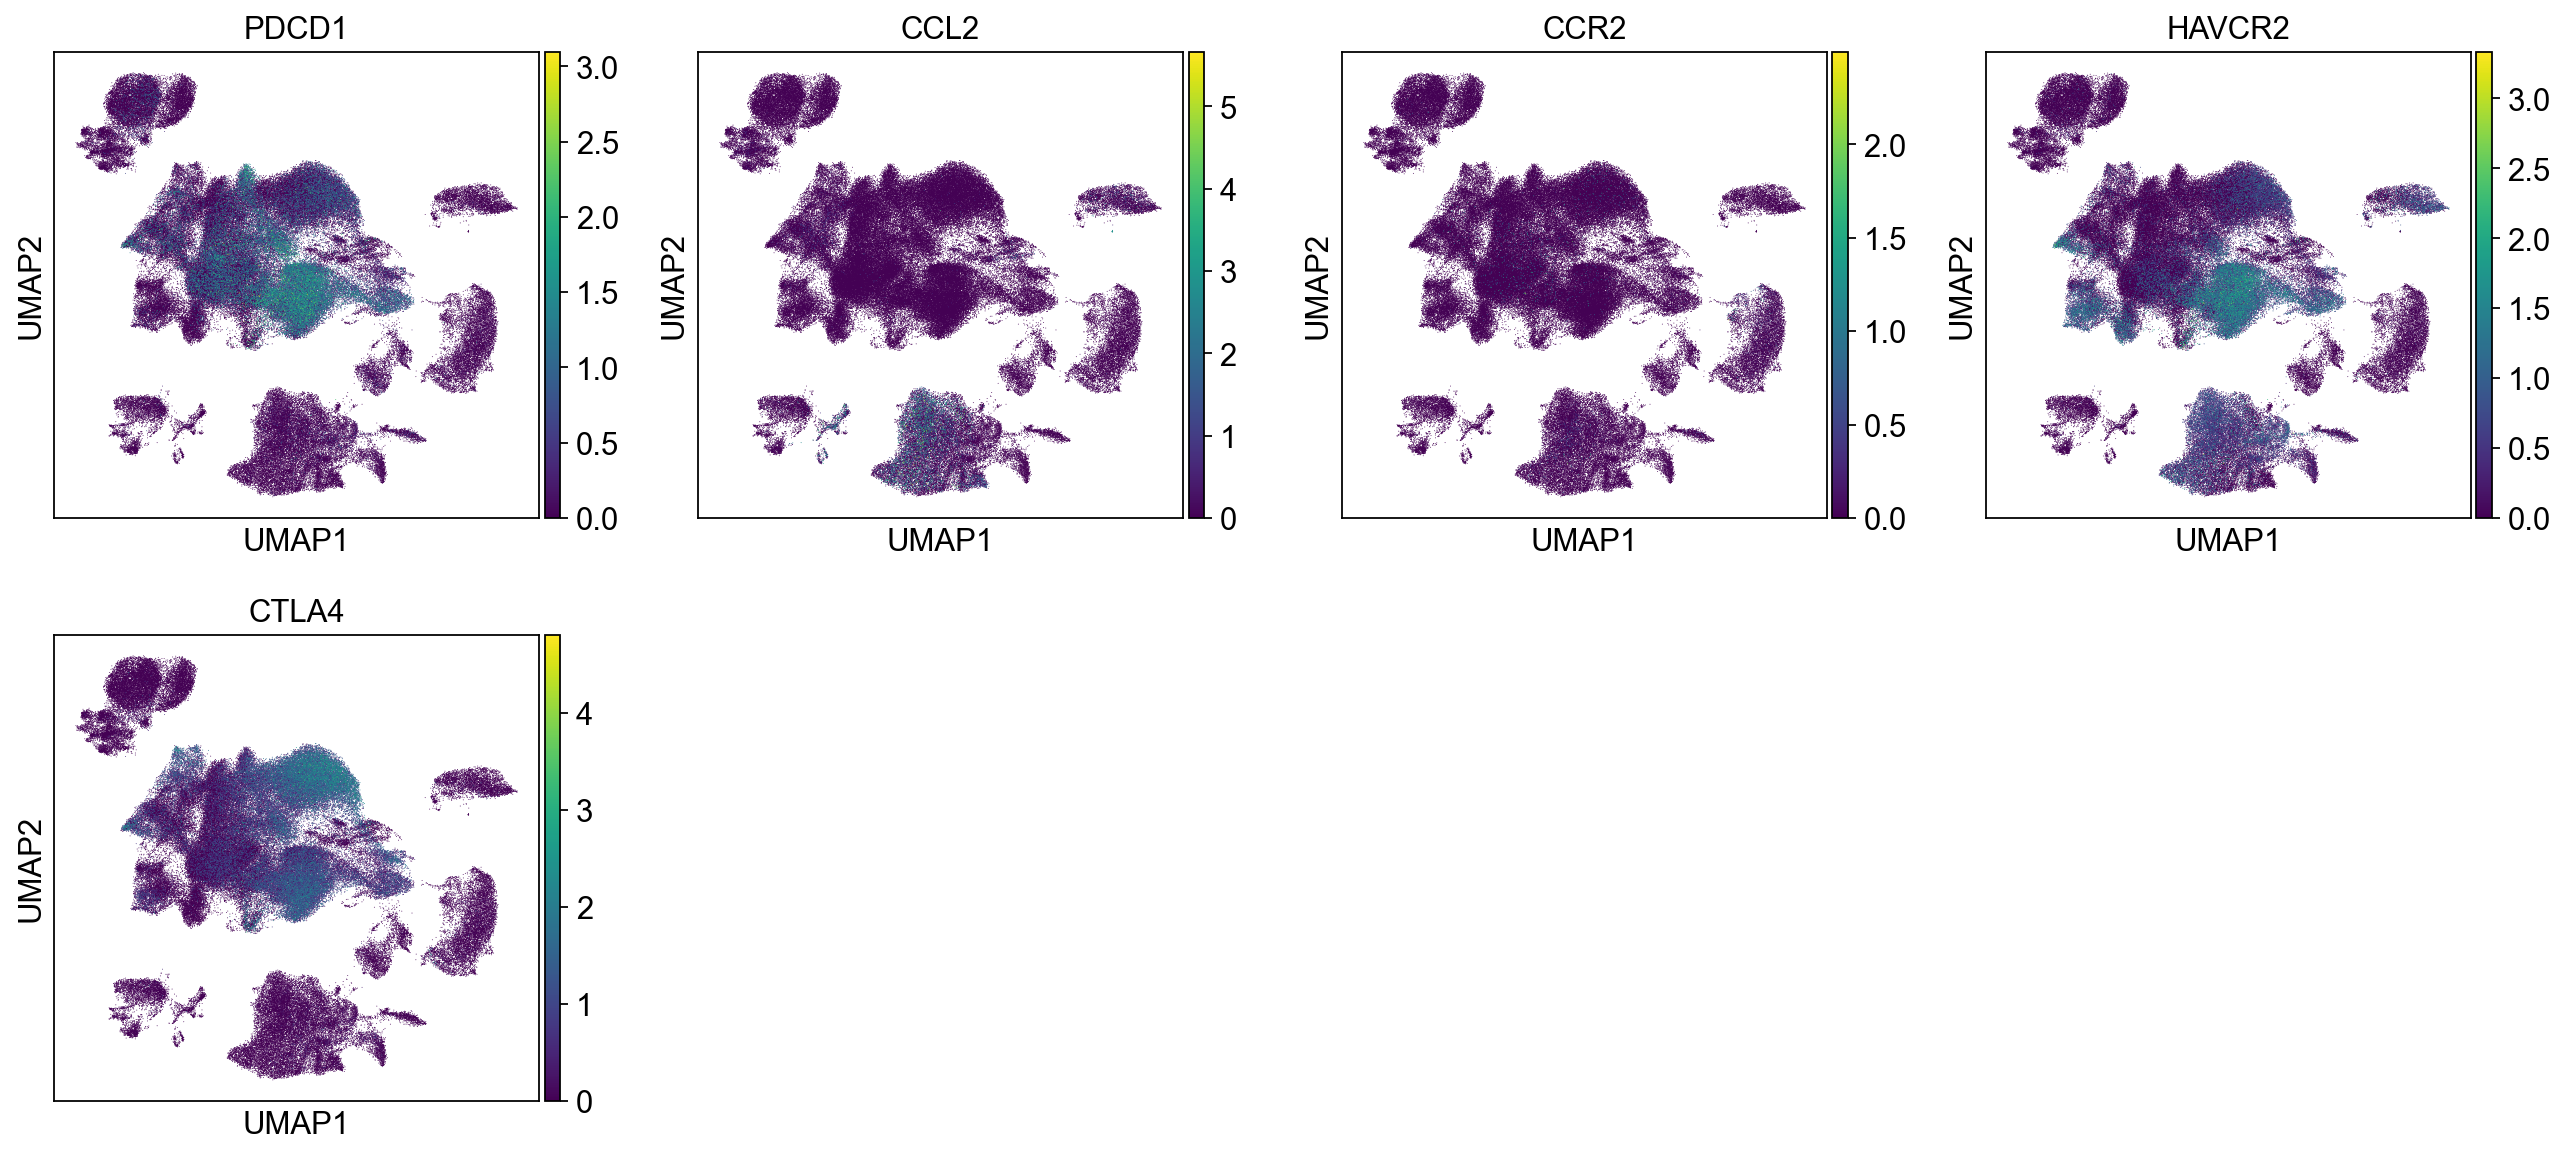

In [43]:
sc.pl.umap(adata_imn, color=['PDCD1','CCL2','CCR2','HAVCR2','CTLA4'])

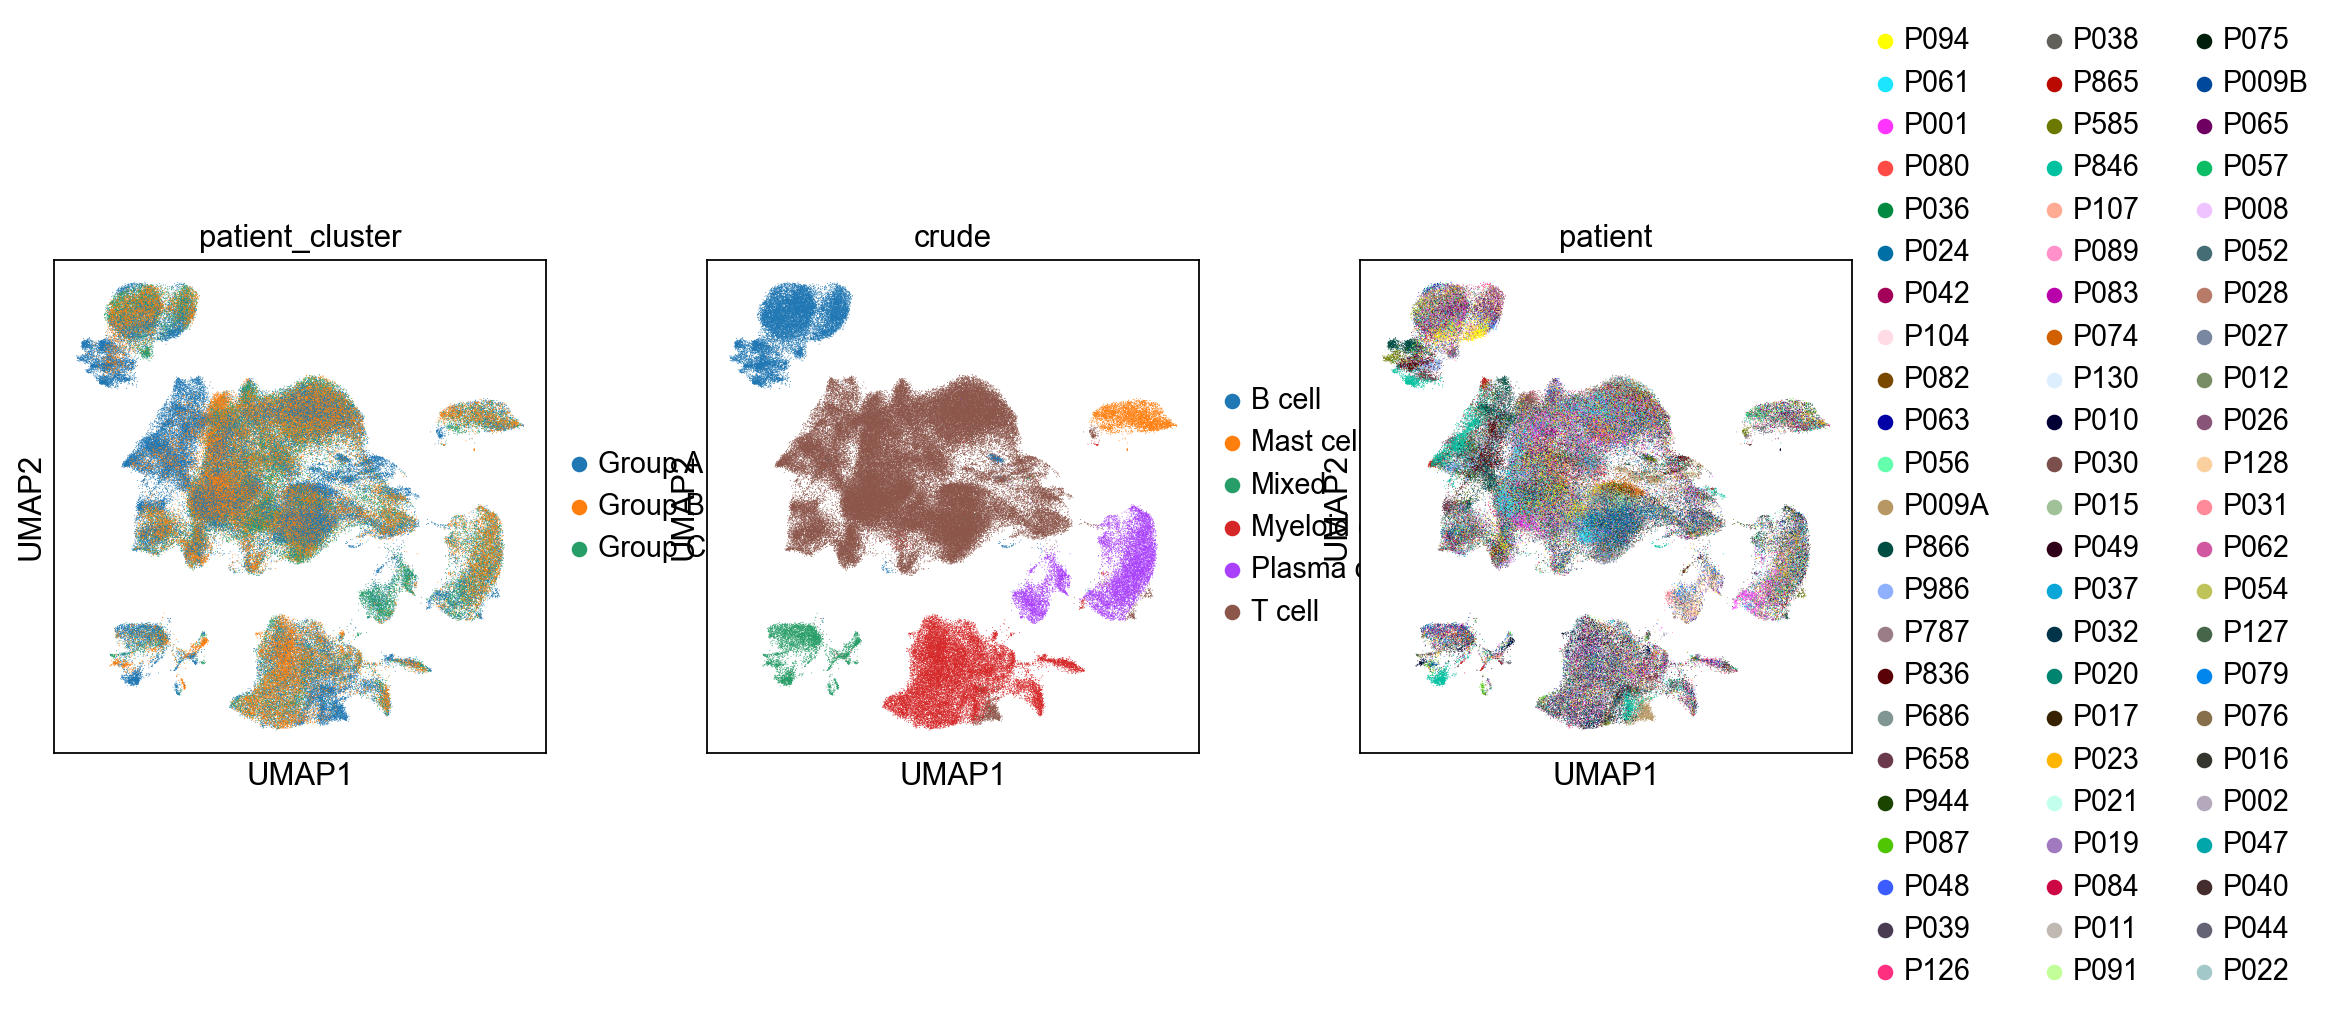

In [44]:
sc.pl.umap(adata_imn, color=['patient_cluster','crude','patient'])

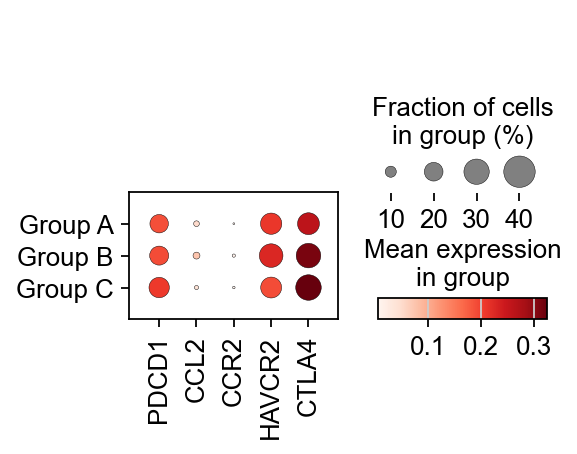

In [45]:
sc.pl.dotplot(adata_imn, ['PDCD1','CCL2','CCR2','HAVCR2','CTLA4'], groupby=['patient_cluster'])

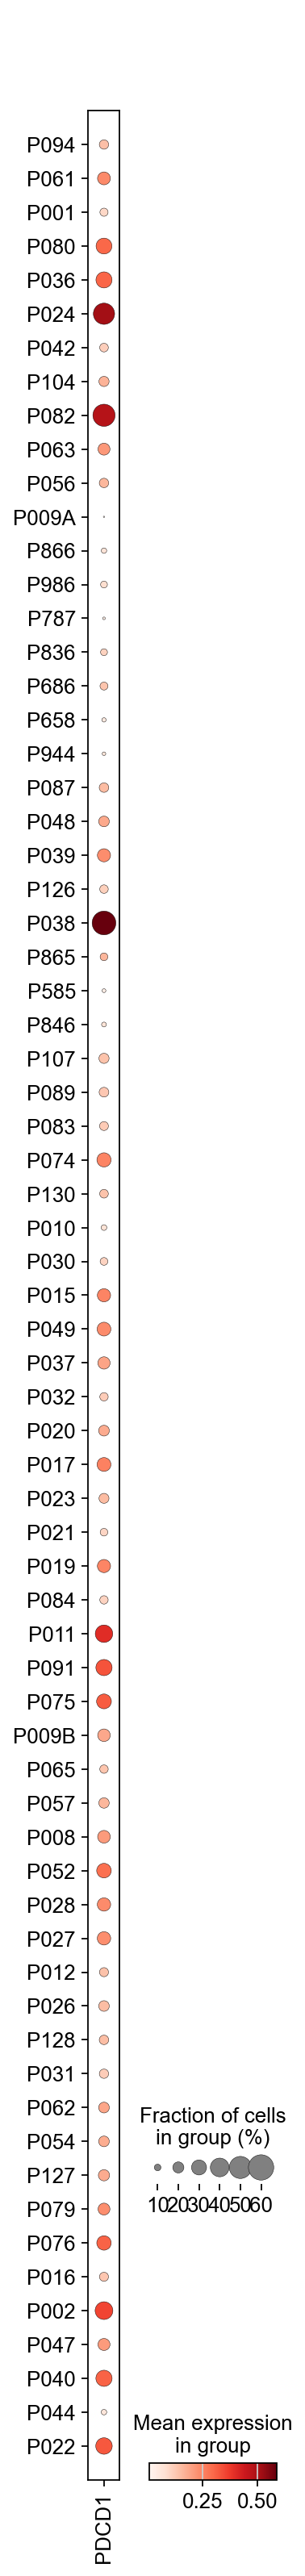

In [46]:
sc.pl.dotplot(adata_imn, ['PDCD1'], groupby=['patient'])

In [47]:
#after seeing the results of CellChat, I found MIF signaling is significant in most of Group A patients

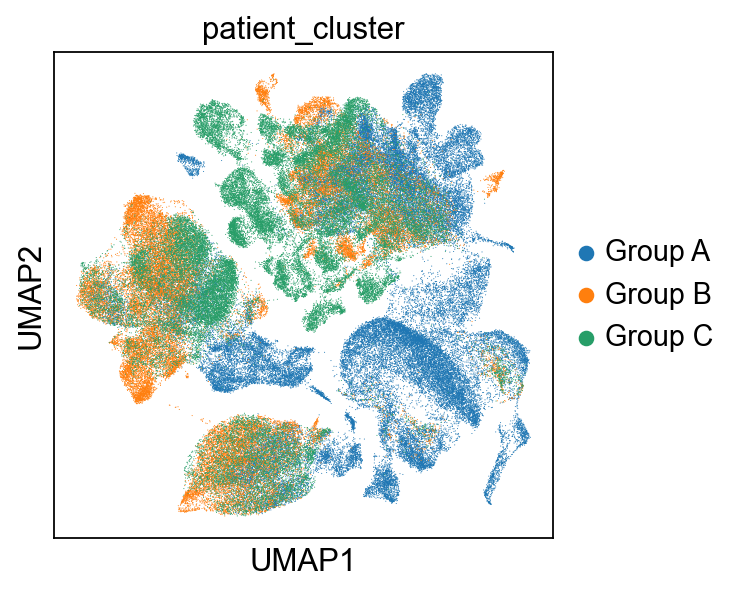

In [48]:
sc.pl.umap(adata_epi_tot, color=['patient_cluster'])

In [49]:
P052.obs['crude']

AAACCTGCAGCTCGAC-1-49-0-2-0           Tumor
AAACCTGGTGACGCCT-1-49-0-2-0           Tumor
AAACGGGCAAGTAATG-1-49-0-2-0           Tumor
AAAGATGAGCGACGTA-1-49-0-2-0           Tumor
AAAGATGCACCGAATT-1-49-0-2-0           Tumor
                                   ...     
TTTGGTTTCTTGCCGT-1-15-1-1            T cell
TTTGTCACATGGTAGG-1-15-1-1            T cell
TTTGTCAGTAGCCTCG-1-15-1-1       Plasma cell
TTTGTCAGTCGACTAT-1-15-1-1            T cell
TTTGTCAGTGTCGCTG-1-15-1-1      Myeloid cell
Name: crude, Length: 4535, dtype: category
Categories (8, object): ['B cell', 'Fibroblast', 'Mast cell', 'Mixed', 'Myeloid cell', 'Plasma cell', 'T cell', 'Tumor']